In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [13]:
# Importar bibliotecas necessárias
import os
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, Input
from keras.utils import to_categorical
from keras.applications import VGG16


In [14]:
# Função para carregar imagens
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalizar entre 0 e 1
    return img, x


In [15]:
# Diretórios de categorias
categories = ['/content/drive/MyDrive/DIO/LML/cat', '/content/drive/MyDrive/DIO/LML/dog']

# Carregar os dados
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(category)
              for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg', '.png', '.jpeg']]
    print(f"Carregando {len(images)} imagens de {category}")
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x': np.array(x[0]), 'y': c})

# Verificar quantidade total de dados
print(f"Total de imagens carregadas: {len(data)}")


Carregando 171 imagens de /content/drive/MyDrive/DIO/LML/cat
Carregando 171 imagens de /content/drive/MyDrive/DIO/LML/dog
Total de imagens carregadas: 342


In [16]:
# Dividir os dados em treino, validação e teste
random.shuffle(data)
train_split = 0.7
val_split = 0.2

idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))

train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]

# Convertendo rótulos para one-hot
num_classes = len(categories)
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Resumo
print(f"Treino: {len(x_train)}, Validação: {len(x_val)}, Teste: {len(x_test)}")


Treino: 239, Validação: 68, Teste: 35


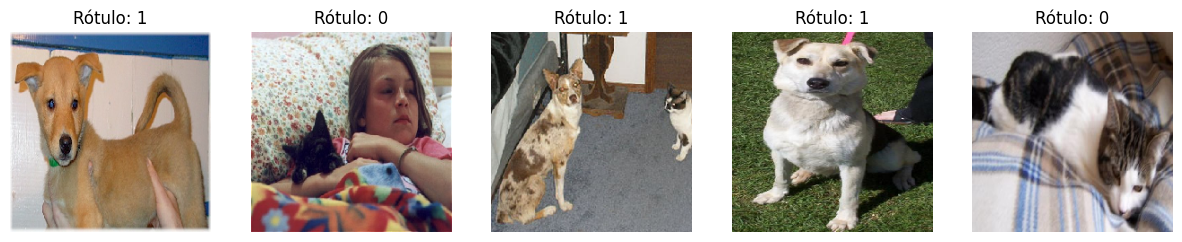

In [17]:
# Visualizar algumas imagens de treino
if len(x_train) > 0:
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(x_train[i])
        ax.set_title(f"Rótulo: {np.argmax(y_train[i])}")
        ax.axis("off")
    plt.show()
else:
    print("Sem imagens para exibir no conjunto de treino.")


In [18]:
# Modelo inicial
model = Sequential()

# Camada de entrada
model.add(Input(shape=x_train.shape[1:]))

# Camadas convolucionais e de pooling
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      23,888,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,898,786 (91.17 MB)

 Trainable params: 23,898,786 (91.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 11s/step - accuracy: 0.4902 - loss: 3.3541 - val_accuracy: 0.5882 - val_loss: 2.8828
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.4871 - loss: 2.9617 - val_accuracy: 0.6324 - val_loss: 0.6417
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 11s/step - accuracy: 0.6178 - loss: 0.7270 - val_accuracy: 0.4118 - val_loss: 1.0863
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 37s 8s/step - accuracy: 0.5339 - loss: 0.8542 - val_accuracy: 0.4706 - val_loss: 0.6732
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 10s/step - accuracy: 0.5897 - loss: 0.7016 - val_accuracy: 0.5882 - val_loss: 0.6553
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 10s/step - accuracy: 0.5566 - loss: 0.6457 - val_accuracy: 0.6029 - val_loss: 0.6793
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.8389 - loss: 0.6124 - val_accuracy: 0.5441 - val_loss: 0.6474
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 9s/step - accuracy: 0.7447 - loss: 0.5531 - val_accuracy: 0.5441 - val_loss: 0.7376
Epoc

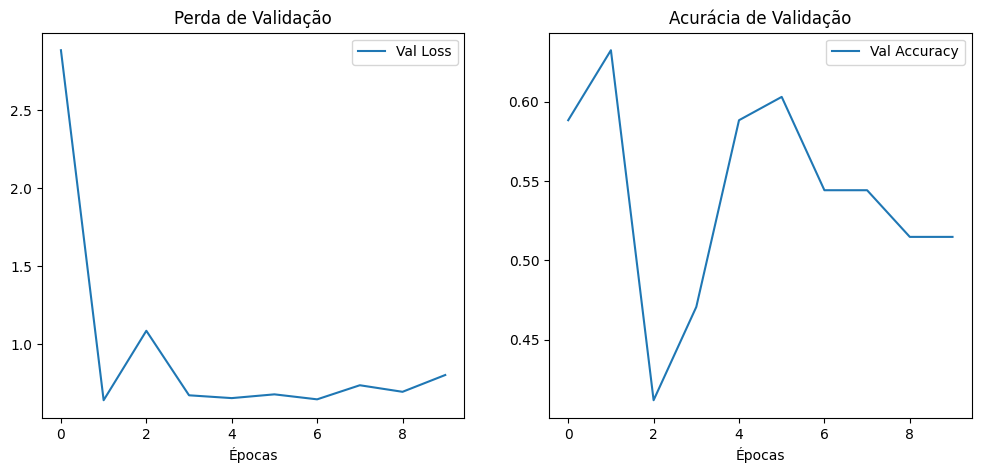

In [19]:
# Treinar o modelo
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

# Plotar histórico de perda e acurácia
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].set_title('Perda de Validação')
axes[0].set_xlabel('Épocas')
axes[0].legend()

axes[1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[1].set_title('Acurácia de Validação')
axes[1].set_xlabel('Épocas')
axes[1].legend()
plt.show()


In [20]:
# Avaliar o modelo no conjunto de teste
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Test loss: 0.7872
Test accuracy: 0.5143


In [21]:
# Carregar o modelo VGG16 pré-treinado
vgg = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# Congelar camadas da VGG16
for layer in vgg.layers:
    layer.trainable = False

# Adicionar camadas personalizadas
x = Flatten()(vgg.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model_vgg = Model(inputs=vgg.input, outputs=x)

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model_vgg.summary()

# Treinar o modelo VGG
history_vgg = model_vgg.fit(x_train, y_train,
                            batch_size=128,
                            epochs=10,
                            validation_data=(x_val, y_val))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 199s 114s/step - accuracy: 0.5477 - loss: 5.1151 - val_accuracy: 0.5882 - val_loss: 2.5872
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 241s 157s/step - accuracy: 0.4716 - loss: 3.9367 - val_accuracy: 0.4118 - val_loss: 7.4437
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 263s 154s/step - accuracy: 0.5470 - loss: 5.6276 - val_accuracy: 0.4118 - val_loss: 5.0033
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 229s 123s/step - accuracy: 0.5313 - loss: 3.2734 - val_accuracy: 0.8824 - val_loss: 0.4008
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 295s 154s/step - accuracy: 0.6282 - loss: 1.0692 - val_accuracy: 0.5882 - val_loss: 1.8637
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 258s 153s/step - accuracy: 0.4908 - loss: 2.1578 - val_accuracy: 0.5882 - val_loss: 1.1587
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 207s 118s/step - accuracy: 0.5382 - loss: 1.2651 - val_accuracy: 0.8088 - val_loss: 0.4062
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 292s 154s/step - accuracy: 0.7735 - loss: 0.5784 - val_accuracy: 0.4559 - v

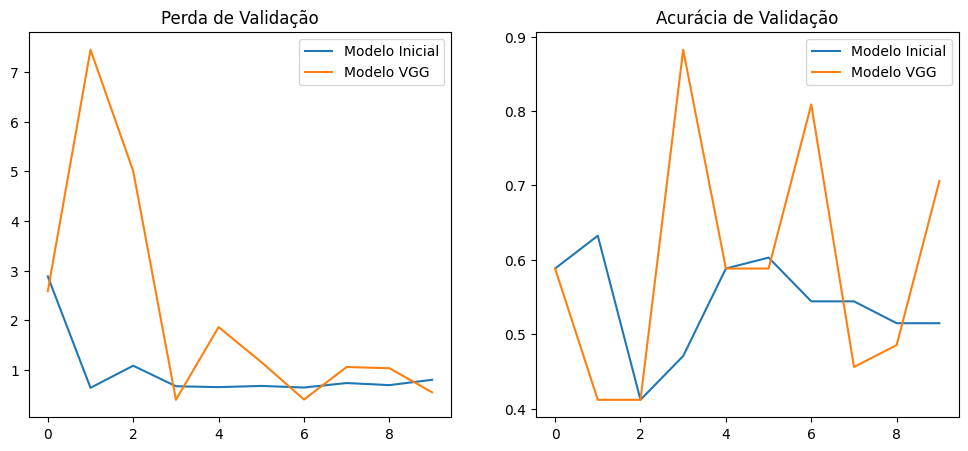

In [22]:
# Comparar desempenho do modelo inicial e do modelo VGG
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(history.history['val_loss'], label='Modelo Inicial')
axes[0].plot(history_vgg.history['val_loss'], label='Modelo VGG')
axes[0].set_title('Perda de Validação')
axes[0].legend()

axes[1].plot(history.history['val_accuracy'], label='Modelo Inicial')
axes[1].plot(history_vgg.history['val_accuracy'], label='Modelo VGG')
axes[1].set_title('Acurácia de Validação')
axes[1].legend()
plt.show()
